In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [4]:
filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [6]:

VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

In [8]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

# **Exercise 1: Install Scikit-Learn**

In [10]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


# **Exercise 2: Read About Classifiers**

# **Exercise 3: Training a Classifier**

In [12]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

In [27]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

In [16]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

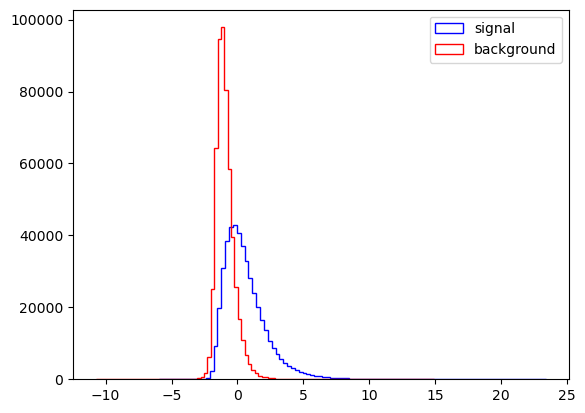

In [18]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

## **Part a**

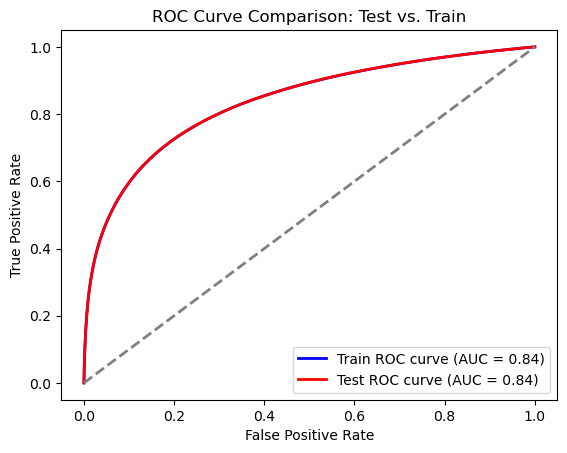

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

import sklearn.discriminant_analysis as DA
Fisher = DA.LinearDiscriminantAnalysis()
Fisher.fit(X_Train, y_Train)

y_train_pred = Fisher.decision_function(X_Train)
y_test_pred = Fisher.decision_function(X_Test)

fpr_train, tpr_train, _ = roc_curve(y_Train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_pred)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Test vs. Train')
plt.legend(loc="lower right")
plt.show()


## **Part b**

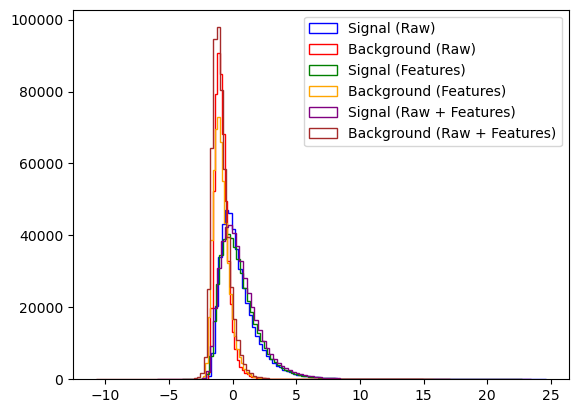

In [22]:
RawNames = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames = list(set(VarNames[1:]).difference(RawNames))

X_Train_Raw = Train_Sample[RawNames]
X_Test_Raw = Test_Sample[RawNames]

X_Train_Features = Train_Sample[FeatureNames]
X_Test_Features = Test_Sample[FeatureNames]

X_Train_Raw_Features = Train_Sample[RawNames + FeatureNames]
X_Test_Raw_Features = Test_Sample[RawNames + FeatureNames]

Fisher.fit(X_Train_Raw, y_Train) 
y_raw_train_pred = Fisher.decision_function(X_Train_Raw)
y_raw_test_pred = Fisher.decision_function(X_Test_Raw)

Fisher.fit(X_Train_Features, y_Train) 
y_features_train_pred = Fisher.decision_function(X_Train_Features)
y_features_test_pred = Fisher.decision_function(X_Test_Features)

Fisher.fit(X_Train_Raw_Features, y_Train)  
y_raw_features_train_pred = Fisher.decision_function(X_Train_Raw_Features)
y_raw_features_test_pred = Fisher.decision_function(X_Test_Raw_Features)

plt.figure()

# Raw features
plt.hist(y_raw_test_pred[Test_Sample["signal"] == 1], bins=100, histtype="step", color="blue", label="Signal (Raw)")
plt.hist(y_raw_test_pred[Test_Sample["signal"] == 0], bins=100, histtype="step", color="red", label="Background (Raw)")

# Features
plt.hist(y_features_test_pred[Test_Sample["signal"] == 1], bins=100, histtype="step", color="green", label="Signal (Features)")
plt.hist(y_features_test_pred[Test_Sample["signal"] == 0], bins=100, histtype="step", color="orange", label="Background (Features)")

# Raw + Features
plt.hist(y_raw_features_test_pred[Test_Sample["signal"] == 1], bins=100, histtype="step", color="purple", label="Signal (Raw + Features)")
plt.hist(y_raw_features_test_pred[Test_Sample["signal"] == 0], bins=100, histtype="step", color="brown", label="Background (Raw + Features)")

plt.legend(loc='upper right')
plt.show()


## **Exercise 4: Comparing Techniques**

## **Part a**

In [24]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier()
ridge_clf.fit(X_Train, y_Train)

ridge_preds = ridge_clf.predict(X_Test)


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_Train, y_Train)

dt_preds = dt_clf.predict(X_Test)


In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_Train, y_Train)

log_reg_preds = log_reg.predict(X_Test)


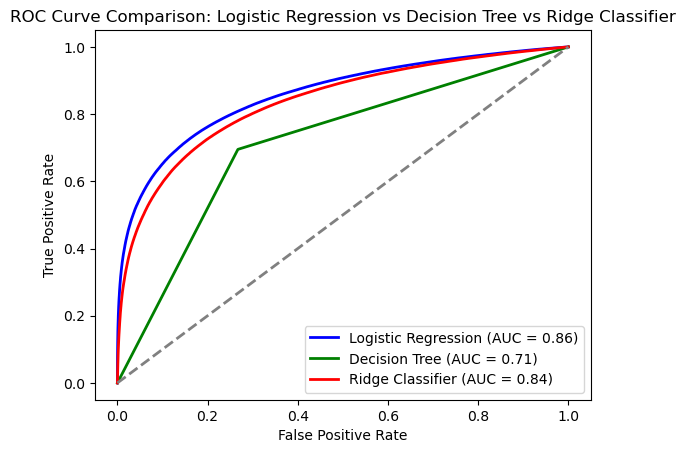

Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82    541767
         1.0       0.83      0.68      0.75    458233

    accuracy                           0.79   1000000
   macro avg       0.80      0.78      0.78   1000000
weighted avg       0.79      0.79      0.79   1000000

Decision Tree Report:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74    541767
         1.0       0.69      0.70      0.69    458233

    accuracy                           0.72   1000000
   macro avg       0.71      0.71      0.71   1000000
weighted avg       0.72      0.72      0.72   1000000

Ridge Classifier Report:
              precision    recall  f1-score   support

         0.0       0.72      0.91      0.80    541767
         1.0       0.84      0.58      0.69    458233

    accuracy                           0.76   1000000
   macro avg       0.78      0.74      0.74   1000000

In [33]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc


# Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_Test, log_reg_preds)
log_reg_report = classification_report(y_Test, log_reg_preds)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_Test, log_reg.predict_proba(X_Test)[:, 1])
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_Test, dt_preds)
dt_report = classification_report(y_Test, dt_preds)
fpr_dt, tpr_dt, _ = roc_curve(y_Test, dt_clf.predict_proba(X_Test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Evaluate Ridge Classifier
ridge_accuracy = accuracy_score(y_Test, ridge_preds)
ridge_report = classification_report(y_Test, ridge_preds)
fpr_ridge, tpr_ridge, _ = roc_curve(y_Test, ridge_clf.decision_function(X_Test))
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)

plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_ridge, tpr_ridge, color='red', lw=2, label='Ridge Classifier (AUC = %0.2f)' % roc_auc_ridge)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic Regression vs Decision Tree vs Ridge Classifier')
plt.legend(loc="lower right")
plt.show()

print(f"Logistic Regression Report:\n{log_reg_report}")
print(f"Decision Tree Report:\n{dt_report}")
print(f"Ridge Classifier Report:\n{ridge_report}")


## **Part b**

In [48]:
def compare_classifier_performance(classifier, X_Train, y_Train, X_Test, y_Test, RawNames, FeatureNames):

    # Raw features
    X_Train_Raw = X_Train[RawNames]
    X_Test_Raw = X_Test[RawNames]

    # Additional features (Features)
    X_Train_Features = X_Train[FeatureNames]
    X_Test_Features = X_Test[FeatureNames]

    # Combined features (Raw + Features)
    X_Train_Raw_Features = X_Train[RawNames + FeatureNames]
    X_Test_Raw_Features = X_Test[RawNames + FeatureNames]

    classifier.fit(X_Train_Raw, y_Train)
    y_raw_test_pred = classifier.decision_function(X_Test_Raw)

    classifier.fit(X_Train_Features, y_Train)
    y_features_test_pred = classifier.decision_function(X_Test_Features)

    classifier.fit(X_Train_Raw_Features, y_Train)
    y_raw_features_test_pred = classifier.decision_function(X_Test_Raw_Features)

    plt.figure()

    # Raw features
    plt.hist(y_raw_test_pred[y_Test == 1], bins=100, histtype="step", color="blue", label="Signal (Raw)")
    plt.hist(y_raw_test_pred[y_Test == 0], bins=100, histtype="step", color="red", label="Background (Raw)")

    # Features
    plt.hist(y_features_test_pred[y_Test == 1], bins=100, histtype="step", color="green", label="Signal (Features)")
    plt.hist(y_features_test_pred[y_Test == 0], bins=100, histtype="step", color="orange", label="Background (Features)")

    # Raw + Features
    plt.hist(y_raw_features_test_pred[y_Test == 1], bins=100, histtype="step", color="purple", label="Signal (Raw + Features)")
    plt.hist(y_raw_features_test_pred[y_Test == 0], bins=100, histtype="step", color="brown", label="Background (Raw + Features)")

    plt.legend(loc='upper right')
    plt.show()


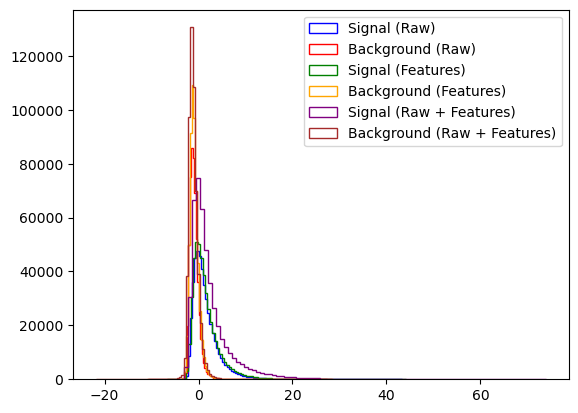

In [50]:
RawNames = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames = list(set(VarNames[1:]).difference(RawNames))

classifier = LogisticRegression(max_iter=1000)

compare_classifier_performance(classifier, X_Train, y_Train, X_Test, y_Test, RawNames, FeatureNames)


## **Part C**

<>:41: SyntaxWarning: invalid escape sequence '\e'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\e'
<>:42: SyntaxWarning: invalid escape sequence '\s'
/var/folders/68/pldchn8x72lfhx61wfttbkdr0000gn/T/ipykernel_37510/4006453130.py:41: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel("Efficiency ($\epsilon_{S,B}(x_c)$)")
/var/folders/68/pldchn8x72lfhx61wfttbkdr0000gn/T/ipykernel_37510/4006453130.py:42: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("Significance ($\sigma_S'$)")
/var/folders/68/pldchn8x72lfhx61wfttbkdr0000gn/T/ipykernel_37510/4006453130.py:35: RuntimeWarning: invalid value encountered in divide
  sigma_S_prime = N_S_prime / np.sqrt(N_S_prime + N_B_prime)


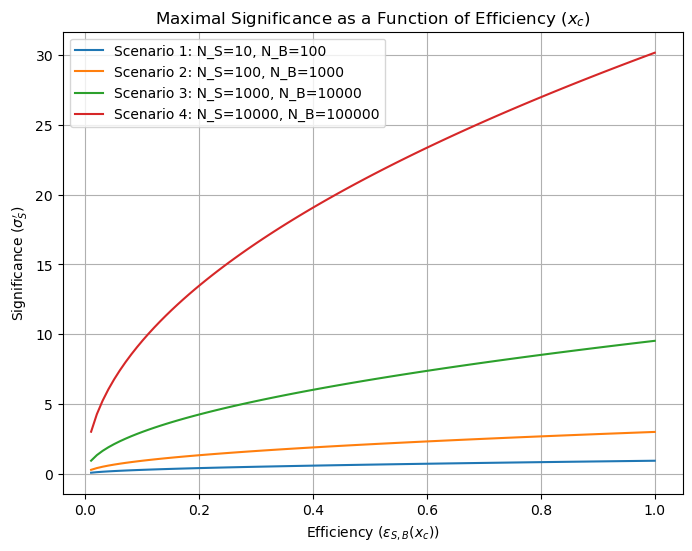

In [54]:
scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 100000}
]

def calculate_significance(N_S, N_B):
    return N_S / np.sqrt(N_S + N_B)

significances = [calculate_significance(scenario["N_S"], scenario["N_B"]) for scenario in scenarios]

x_c_values = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for i, scenario in enumerate(scenarios):
    N_S = scenario["N_S"]
    N_B = scenario["N_B"]

    N_S_prime = x_c_values * N_S
    N_B_prime = x_c_values * N_B

    sigma_S_prime = N_S_prime / np.sqrt(N_S_prime + N_B_prime)

    plt.plot(x_c_values, sigma_S_prime, label=f"Scenario {i+1}: N_S={N_S}, N_B={N_B}")

plt.xlabel("Efficiency ($\epsilon_{S,B}(x_c)$)")
plt.ylabel("Significance ($\sigma_S'$)")
plt.title("Maximal Significance as a Function of Efficiency ($x_c$)")
plt.legend()
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>

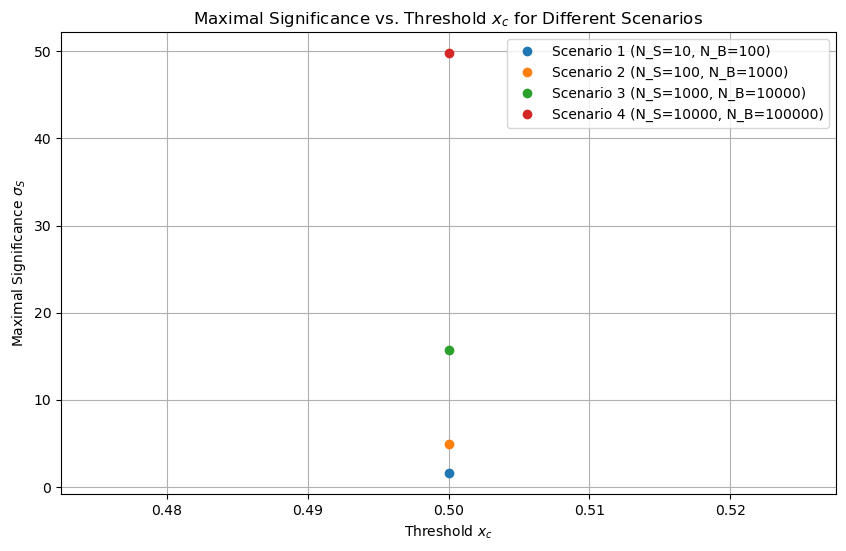

In [64]:
scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 100000},
]

classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_Train, y_Train)

y_pred_proba = classifier.predict_proba(X_Test)[:, 1]

epsilon_S = []
epsilon_B = []

for scenario in scenarios:
    N_S = scenario["N_S"]
    N_B = scenario["N_B"]

    sig_probs = y_pred_proba[Test_Sample["signal"] == 1]
    bkg_probs = y_pred_proba[Test_Sample["signal"] == 0]

    xc = 0.5  
    epsilon_S_value = np.mean(sig_probs > xc)
    epsilon_B_value = np.mean(bkg_probs > xc)
    
    epsilon_S.append(epsilon_S_value)
    epsilon_B.append(epsilon_B_value)

significance_values = []

for i, scenario in enumerate(scenarios):
    N_S = scenario["N_S"]
    N_B = scenario["N_B"]
    
    # Calculate N'_S and N'_B
    N_prime_S = epsilon_S[i] * N_S
    N_prime_B = epsilon_B[i] * N_B
    
    # Compute the significance
    sigma_S = N_prime_S / np.sqrt(N_prime_S + N_prime_B)
    significance_values.append(sigma_S)

plt.figure(figsize=(10, 6))
for i, scenario in enumerate(scenarios):
    plt.plot([0.5], [significance_values[i]], 'o', label=f"Scenario {i+1} (N_S={scenario['N_S']}, N_B={scenario['N_B']})")

plt.xlabel('Threshold $x_c$')
plt.ylabel('Maximal Significance $\\sigma_S$')
plt.title('Maximal Significance vs. Threshold $x_c$ for Different Scenarios')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# **Exercise 5**

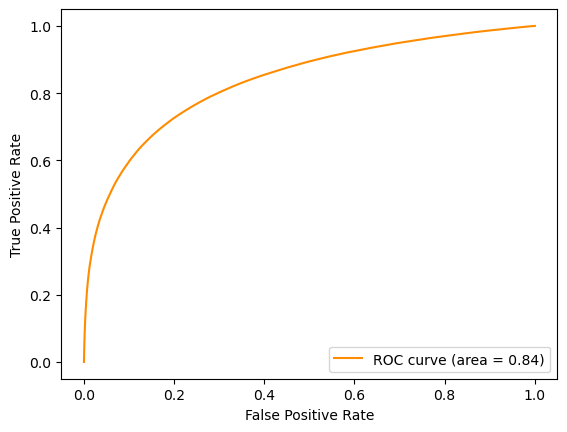

In [69]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## **Part a**

Accuracy: 0.79
Precision: 0.83
Recall: 0.68
F1 Score: 0.75
ROC AUC: 0.86


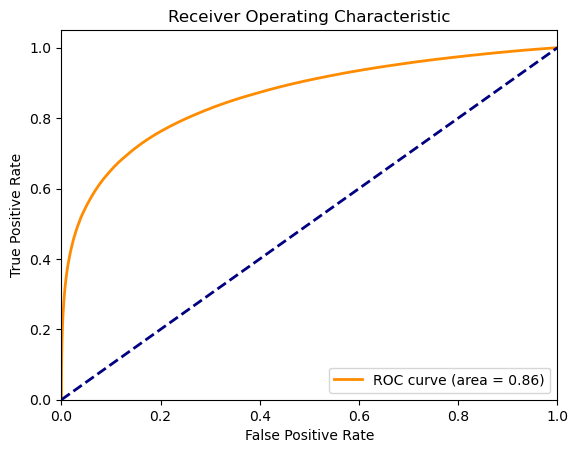

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc

# Accuracy
accuracy = accuracy_score(y_Test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_Test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_Test, y_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_Test, y_pred)
print(f"F1 Score: {f1:.2f}")

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_Test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## **Part b**

In [77]:
scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 100000},
]

classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_Train, y_Train)

y_pred_proba = classifier.predict_proba(X_Test)[:, 1]  
y_pred = classifier.predict(X_Test)  

results = []

for scenario in scenarios:
    N_S = scenario["N_S"]
    N_B = scenario["N_B"]

    # Calculate ROC and AUC
    fpr, tpr, _ = roc_curve(y_Test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Compute Precision, Recall, F1-Score, Accuracy
    precision = precision_score(y_Test, y_pred)
    recall = recall_score(y_Test, y_pred)
    f1 = f1_score(y_Test, y_pred)
    accuracy = accuracy_score(y_Test, y_pred)

    # Compute maximal significance
    epsilon_S = np.mean(y_pred_proba[y_Test == 1] > 0.5)  
    epsilon_B = np.mean(y_pred_proba[y_Test == 0] > 0.5)  
    N_prime_S = epsilon_S * N_S
    N_prime_B = epsilon_B * N_B
    sigma_S = N_prime_S / np.sqrt(N_prime_S + N_prime_B)

    results.append({
        "Scenario": f"Scenario {scenarios.index(scenario) + 1}",
        "TPR (Recall)": recall,
        "FPR": fpr[1],  
        "AUC": roc_auc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "Maximal Significance (σ_S)": sigma_S
    })


df_results = pd.DataFrame(results)




In [79]:
df_results

,Scenario,TPR (Recall),FPR,AUC,Precision,Recall,F1 Score,Accuracy,Maximal Significance (σ_S)
0,Scenario 1,0.677568,0.0,0.858159,0.829581,0.677568,0.745908,0.788469,1.573247
1,Scenario 2,0.677568,0.0,0.858159,0.829581,0.677568,0.745908,0.788469,4.975043
2,Scenario 3,0.677568,0.0,0.858159,0.829581,0.677568,0.745908,0.788469,15.732468
3,Scenario 4,0.677568,0.0,0.858159,0.829581,0.677568,0.745908,0.788469,49.750432
